# 1. Dataset Walk Through

In [40]:
import os
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.io as pio





In [41]:
df = pd.read_csv('gdp.csv')
df.head()


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [42]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

- Check Description of Each Column

In [43]:
df['Country Name'].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [44]:
df['Country Code'].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

In [45]:
df['Year'].describe()

count    11507.000000
mean      1991.265230
std         15.886648
min       1960.000000
25%       1978.000000
50%       1993.000000
75%       2005.000000
max       2016.000000
Name: Year, dtype: float64

In [46]:
df['Year'].max()

2016

In [47]:
df['Year'].min()

1960

In [48]:
df['Value'].describe()

count    1.150700e+04
mean     1.005972e+12
std      4.533056e+12
min      8.824448e+06
25%      2.056874e+09
50%      1.436880e+10
75%      1.796394e+11
max      7.904923e+13
Name: Value, dtype: float64

- Analysing Arab World Data

In [49]:
df_pr = df[df['Country Name'] == 'Arab World']

In [50]:
df_pr

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
5,Arab World,ARB,1973,5.501839e+10
6,Arab World,ARB,1974,1.051458e+11
7,Arab World,ARB,1975,1.163370e+11
8,Arab World,ARB,1976,1.448462e+11
9,Arab World,ARB,1977,1.673083e+11


<Axes: xlabel='Year Wise Growth', ylabel='GDP Growth'>

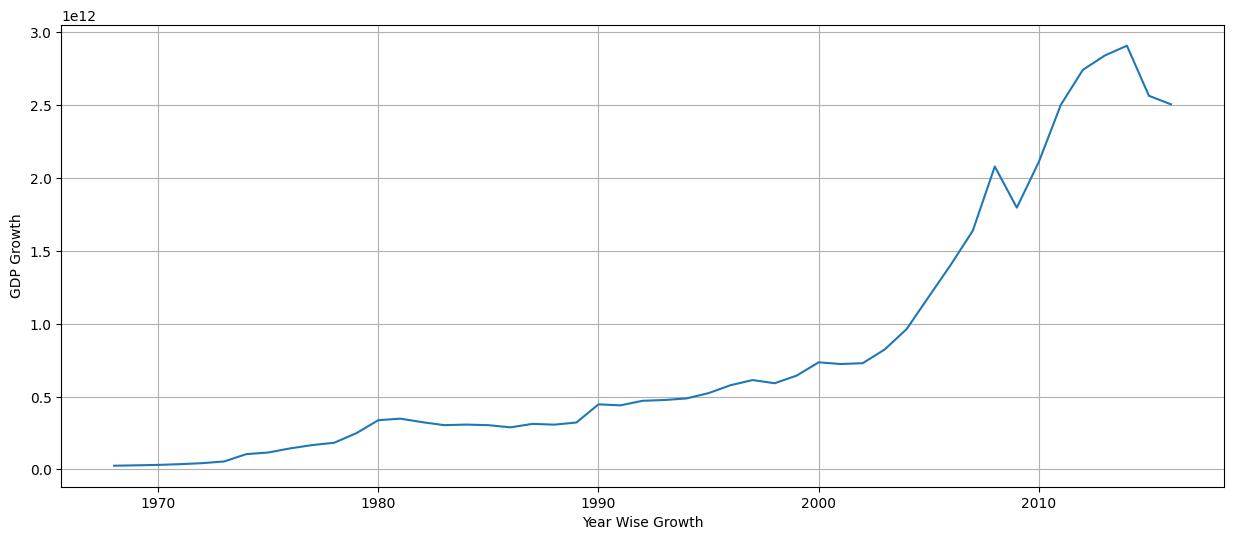

In [51]:
df_pr.plot(kind = 'line', x = 'Year', y = 'Value', 
           figsize = (15,6),
           grid = True,
           legend = False,
           ylabel = 'GDP Growth',
           xlabel = 'Year Wise Growth')

In [53]:
round(((2843-2576) / 2576)* 100, 2)
# round(((cur-prev) / prev) *100, 2)

10.36

# 2. GDP Growth of a Country

- Finding of GDP Year Wise


In [54]:
df_pr = df[df['Country Name'] == 'Arab World']

data = df_pr.values

gdp_change = [0]
for i in range(1,len(data)):
    prev = data[i-1][3]
    cur = data[i][3]
    gdp_change.append(round(((cur-prev) / prev) *100, 2))


- Adding a new Column as GDP 


In [55]:
df_pr.assign(GDP = gdp_change)

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51


## 3. GDP Growth on a Whole Dataset

In [56]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values

    gdp_change = [0]
    for i in range(1,len(data)):
        prev = data[i-1][3]
        cur = data[i][3]
        
        gdp_change.append(round(((cur-prev) / prev) *100, 2))
        
    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)
  


In [57]:
df = pd.concat(final_data, axis = 0)
df

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [58]:
df.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [59]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

# 4.GDP OF Each Country

In [60]:
import plotly.io as pio
pio.renderers.default = 'iframe'
df_pr = df[df['Country Name'] == 'World']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'World GDP Analysis')
fig.show()


## Saving Graph Offline
pyo.plot(fig, filename = 'World GDP.html')

'World GDP.html'

- For India's GDP

In [117]:
import plotly.io as pio
pio.renderers.default = 'iframe'
df_pr = df[df['Country Name'] == 'India']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'India GDP Analysis', range_y = [0, 4000000000000])
fig

pyo.plot(fig, filename = 'India GDP.html')

'India GDP.html'

- For China's GDP

In [107]:
import plotly.io as pio
pio.renderers.default = 'iframe'
df_pr = df[df['Country Name'] == 'China']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'China GDP Analysis')
fig

- FOR Pakistan's GDP

In [106]:
import plotly.io as pio
pio.renderers.default = 'iframe'
df_pr = df[df['Country Name'] == 'Pakistan']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'Pakistan GDP Analysis')
fig

- For USA GDP

In [118]:
import plotly.io as pio
pio.renderers.default = 'iframe'
df_pr = df[df['Country Name'] == 'United States']

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'United States GDP Analysis')
fig
pyo.plot(fig, filename = 'United States GDP.html')

'United States GDP.html'

## 5.GDP Of All Country

In [18]:
os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

## 6.GDP Comparison Between Specific Countries

In [22]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    
    df_pr = pd.concat(dfs, axis = 0)

In [24]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

pyo.plot(fig, filename = '_'.join(lst) + '.html')

'IND_ITA_USA_CHN.html'

In [27]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) + '.html', auto_open = isOpen)
    

In [29]:
compare_gdp(['IND','USA'], False)

## 7.GDP Growth Comparison

## GDP Growth Comparison between Specific Countries


In [61]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '_'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) + '.html', auto_open = isOpen)
    


In [62]:
compare_gdp(['IND','USA','ITA','CHN'], True)


## GDP Growth Comparies of All the Countries


In [63]:
fig = px.line(df, x = 'Year', y = 'GDP', title = 'GDP Comparison', color = 'Country Name')
pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'

## GDP Growth of All Countries Graph Individual


In [64]:
os.mkdir('GDP Growth Individual')

for country_name in df['Country Code'].unique():

    df_pr = df[df['Country Code'] == country_name]

    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = country_name)
    pyo.plot(fig, filename = 'GDP Growth Individual/' + country_name + '.html', auto_open = False)

## GDP Growth between 1960 - 2016


In [65]:
dfs = []

for country_name in df['Country Name'].unique():
    df_pr = df[df['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [66]:
df_pr


,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [67]:

fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'